# Salary Predictions Based on Job Descriptions

In [21]:
#import your libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import sys
#etc

#your info here
__author__ = "Clarissa Carvalho Chevalier"
__email__ = "chevalierclarissa@gmail.com"

# Part 1 - DEFINE

### ---- 1 Define the problem ----

## Part 2 - DISCOVER

### ---- 2 Load the data ----
load the data into a Pandas dataframe

In [3]:
df = pd.read_csv('data/train_features.csv')
target_df = pd.read_csv('data/train_salaries.csv')
test_df = pd.read_csv('data/test_features.csv')

In [30]:
merged = df.merge(target_df, how='left', on='jobId')
merged.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### ---- 3 Clean the data ----
look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [31]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


#### Check for duplicates

In [32]:
merged.jobId.nunique() == len(df)

True

#### Check for null values

In [33]:
merged.isnull().sum().sort_values(ascending=False)

salary                 0
milesFromMetropolis    0
yearsExperience        0
industry               0
major                  0
degree                 0
jobType                0
companyId              0
jobId                  0
dtype: int64

#### Check for unique values:
    - discrete feature w only one value (not explainatory)
    - discrete feature w high cardinality

In [34]:
merged.nunique().sort_values(ascending=False)

jobId                  1000000
salary                     280
milesFromMetropolis        100
companyId                   63
yearsExperience             25
major                        9
jobType                      8
industry                     7
degree                       5
dtype: int64

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [35]:
merged.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'salary distribution')

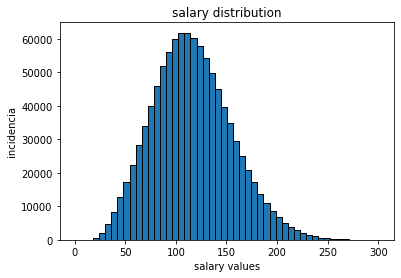

In [27]:
plt.hist(target_df['salary'], bins =50, edgecolor = 'k')
plt.ylabel('incidencia')
plt.xlabel('salary values')
plt.title('salary distribution')

### Density plots

In [90]:
merged['milesqcut'] = pd.qcut(merged['milesFromMetropolis'], q=4, labels=['up to 25miles', 'up to 50miles','up to 75miles','up to 99miles']) #to make quantiles in describe function
merged['yearsqcut'] = pd.qcut(merged['yearsExperience'], q=4, labels=['up to 6y', 'up to 12y','up to 18y','up to 24y']) #to make quantiles in describe function

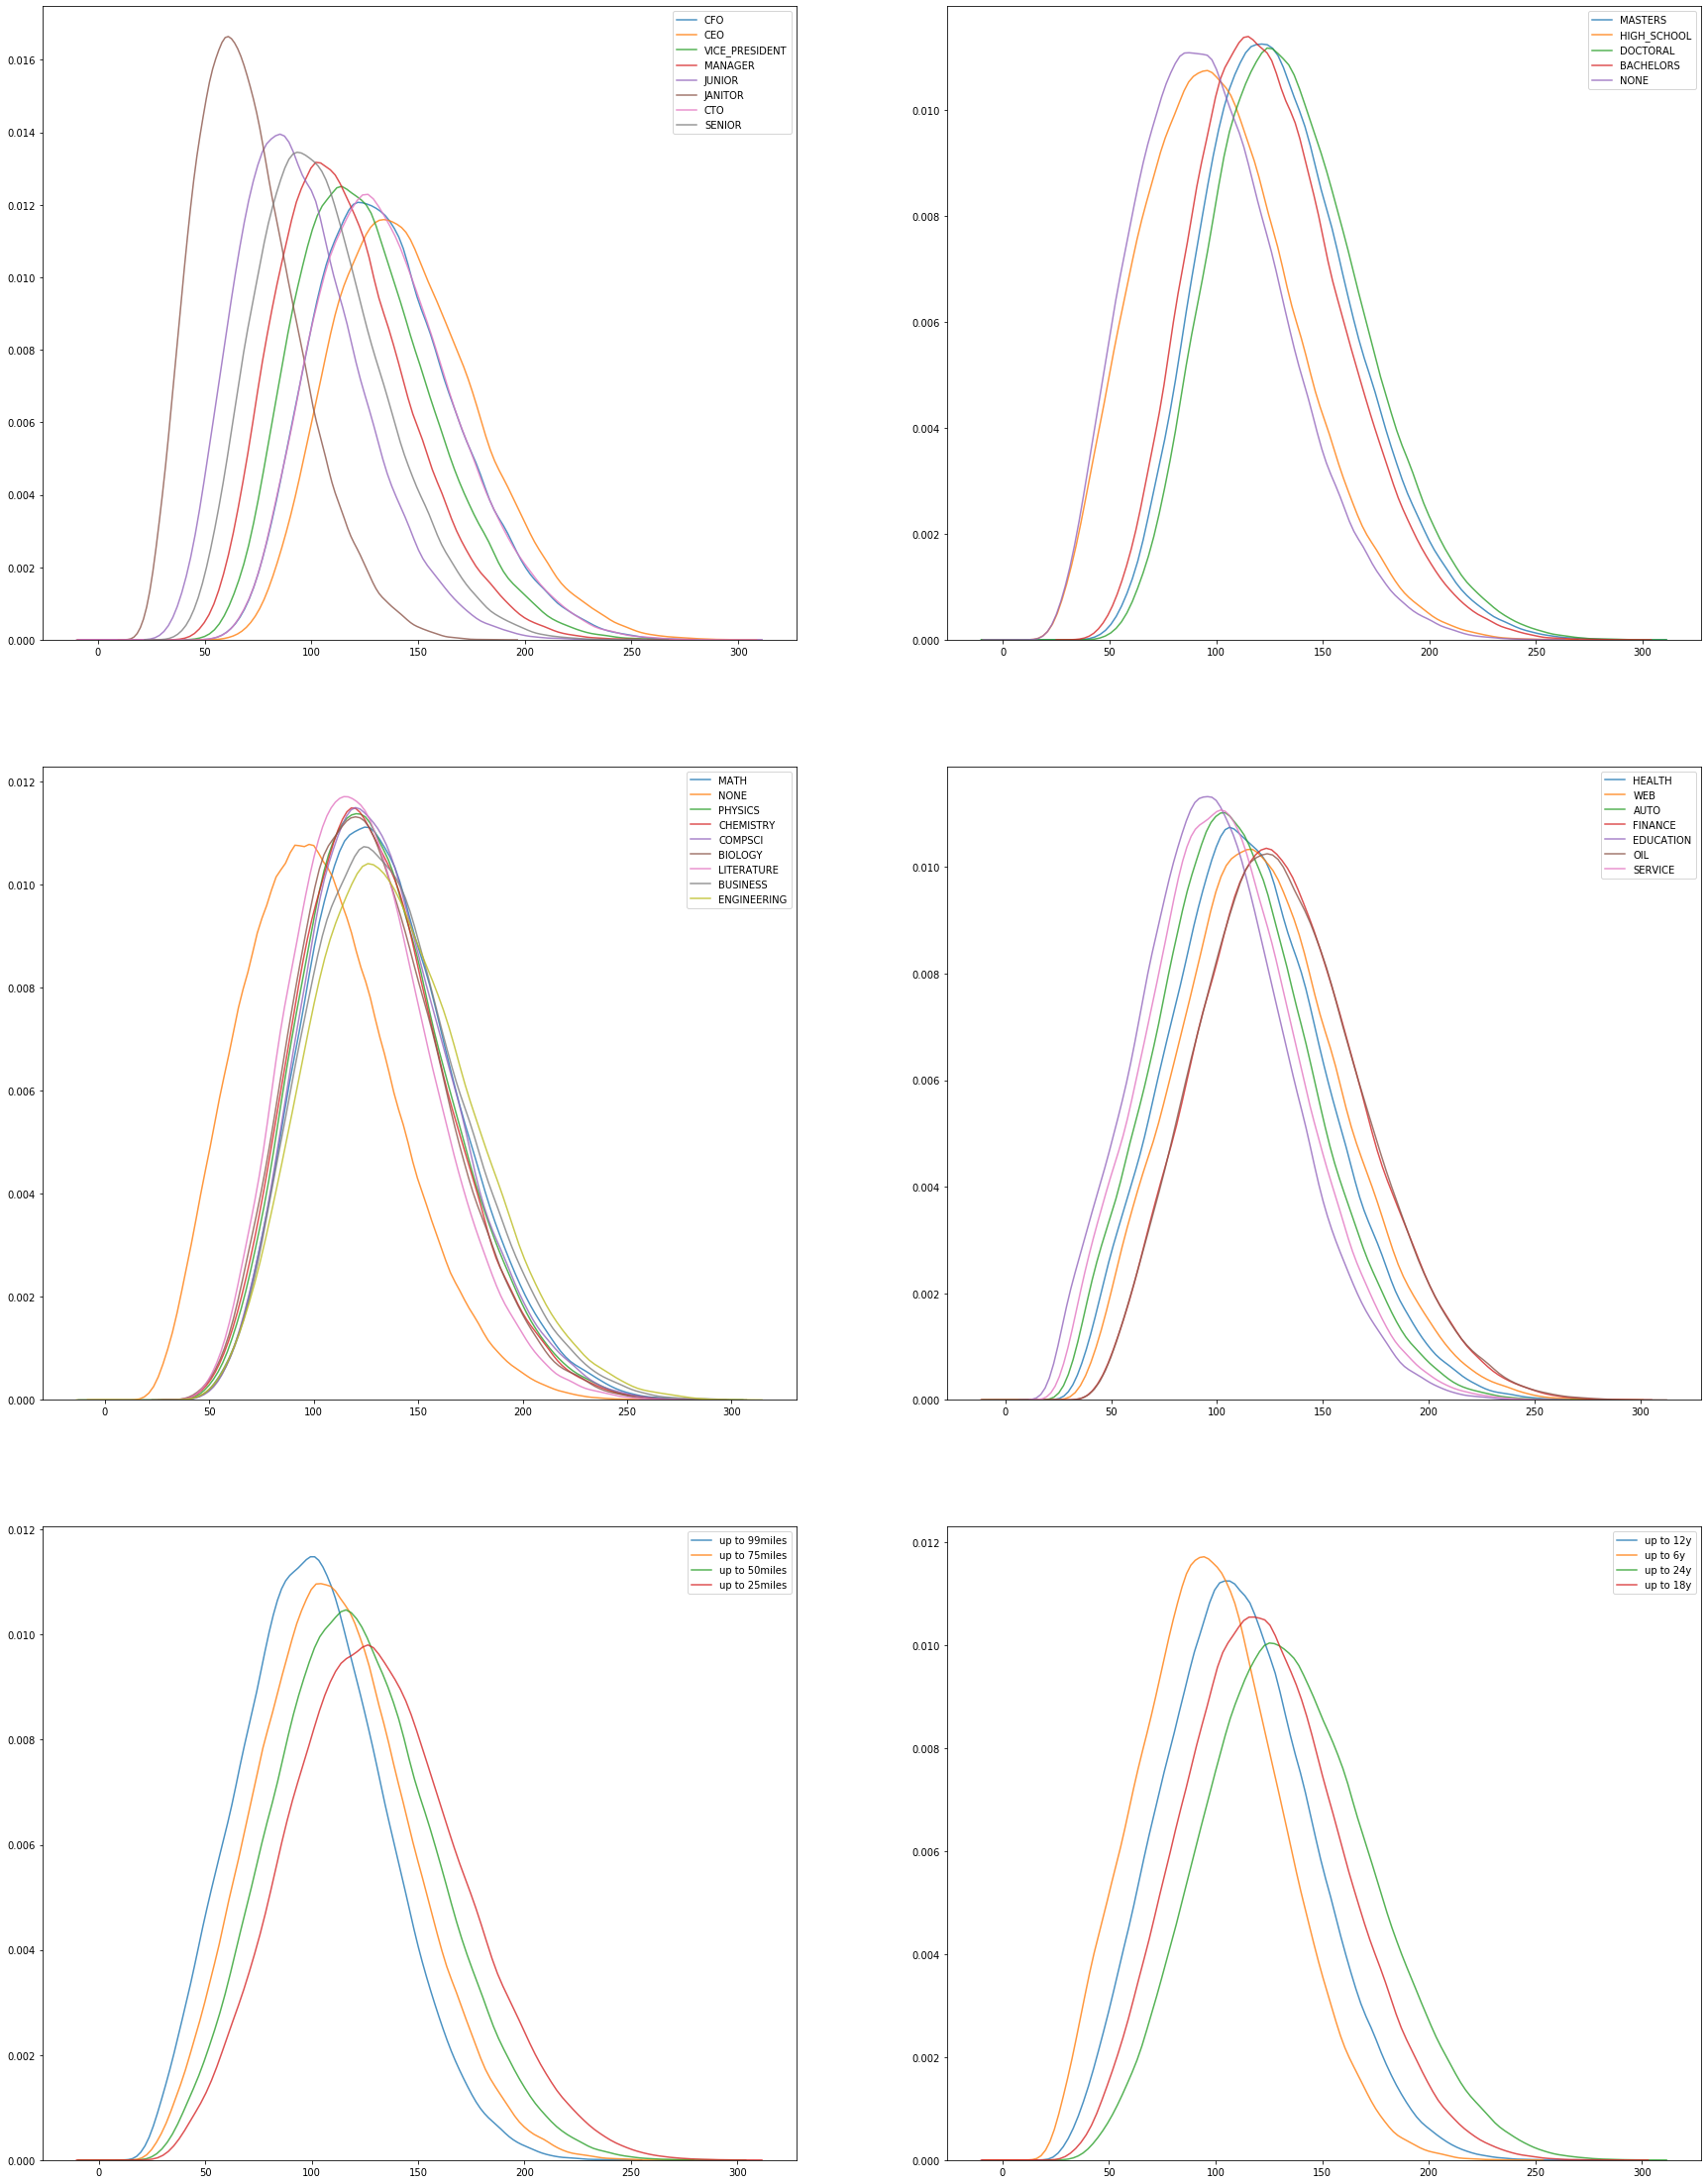

In [91]:
nrows=3; ncols=2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*10, ncols*20))

cols_list = np.array(merged.columns.drop(['salary', 'jobId', 
                                          'companyId','milesFromMetropolis','yearsExperience'])).reshape(3,2)
for col_row, ax_row in zip(cols_list, axes):
    for unit, ax in zip(col_row, ax_row):
        
        for subject in merged[unit].unique():
            subset = merged[merged[unit] == subject]
            sns.kdeplot(subset['salary'], label=subject, shade=False, alpha=0.8, ax=ax)

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

In [ ]:
class preprocess:
    
    def __init__(self, cols_to_filter):
        self.cols_to_filter = cols_to_filter
    
    def fit(self, X, y=None):
        return X
    
    def transform(self, X, y=None):
        return X_new

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data